# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Marchio Apriadi
- **Email:** marchiof1202@gmail.com
- **ID Dicoding:** Marchio12

## Menentukan Pertanyaan Bisnis

- Bagaimana perbandingan antara pengguna casual dan registered?
- Bagaimana cuaca dan musim mempengaruhi jumlah penyewaan sepeda?
- Kapan waktu puncak dan waktu sepi penggunaan sepeda dalam sehari dan dalam seminggu?

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats.mstats import winsorize

## Data Wrangling

### Gathering Data

In [2]:
day_df = pd.read_csv('/content/day.csv')
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [3]:
hour_df = pd.read_csv('/content/hour.csv')
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- instant: record index
- dteday : date
- season : season (1:springer, 2:summer, 3:fall, 4:winter)
- yr : year (0: 2011, 1:2012)
- mnth : month ( 1 to 12)
- hr : hour (0 to 23)
- holiday : weather day is holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
- weekday : day of the week
- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
- weathersit :
	- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
	- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
	- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
	- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp : Normalized temperature in Celsius. The values are divided to 41 (max)
- atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
- hum: Normalized humidity. The values are divided to 100 (max)
- windspeed: Normalized wind speed. The values are divided to 67 (max)
- casual: count of casual users
- registered: count of registered users
- cnt: count of total rental bikes including both casual and registered


**Data Set**

Bike-sharing rental process is highly correlated to the environmental and seasonal settings. For instance, weather conditions,
precipitation, day of week, season, hour of the day, etc. can affect the rental behaviors. The core data set is related to  
the two-year historical log corresponding to years 2011 and 2012 from Capital Bikeshare system, Washington D.C., USA which is
publicly available in http://capitalbikeshare.com/system-data. We aggregated the data on two hourly and daily basis and then
extracted and added the corresponding weather and seasonal information. Weather information are extracted from http://www.freemeteo.com.


### Assessing Data

In [4]:
print('\n', day_df.info())
print('\n', hour_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB

 None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data colum

**Insight: Dengan menggunakan method info() didapat beberapa point penting seperti :**
- terdapat 731 entry dan 17379 entry pada masing-masing dataset
- semua entry dalam setiap column memiliki nilai yang sama dan sesuai sehingga *sementara* dapat disimpulkan bahwa tidak ada missing value
- untuk column *dteday* didapatkan memiliki tipe data **object**. Untuk mempermudah proses analisis, tipe data pada column ini akan diubah menjadi **datetime**
- pada column *season, yr, mnth, hr, holiday, weekday, workingday, wethersit* didapatkan memiliki tipe data **int**, mengenai hal ini tipe data dapat diubah kedalam **category** dengan tujuan efisiensi

*mencari missing value*

In [5]:
print('\nInfo missing value pada data day:\n', day_df.isna().sum())
print('\nInfo missing value pada data hour:\n', hour_df.isna().sum())


Info missing value pada data day:
 instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Info missing value pada data hour:
 instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


**Insight: Dengan menggunakan method isna() didaptkan bahwa :**
- tidak ditemukan missing value pada data day.csv
- tidak ditemukan miissing value pada data hour.csv

*mencari duplikasi pada data*

In [6]:
print('Info data duplikat day:', day_df.duplicated().sum())
print('Info data duplikat hour:', hour_df.duplicated().sum())

Info data duplikat day: 0
Info data duplikat hour: 0


**Insight: Dengan menggunakan method duplicated() dapat disimpulkan bahwa :**
- tidak ditemukan duplikasi pada data day.csv
- tidak ditemukan duplikasi value pada data hour.csv

In [7]:
print('\nData describe day\n', day_df.describe(include='all'))
print('\nData describe hour:\n', hour_df.describe(include='all'))


Data describe day
            instant      dteday      season          yr        mnth  \
count   731.000000         731  731.000000  731.000000  731.000000   
unique         NaN         731         NaN         NaN         NaN   
top            NaN  2011-01-01         NaN         NaN         NaN   
freq           NaN           1         NaN         NaN         NaN   
mean    366.000000         NaN    2.496580    0.500684    6.519836   
std     211.165812         NaN    1.110807    0.500342    3.451913   
min       1.000000         NaN    1.000000    0.000000    1.000000   
25%     183.500000         NaN    2.000000    0.000000    4.000000   
50%     366.000000         NaN    3.000000    1.000000    7.000000   
75%     548.500000         NaN    3.000000    1.000000   10.000000   
max     731.000000         NaN    4.000000    1.000000   12.000000   

           holiday     weekday  workingday  weathersit        temp  \
count   731.000000  731.000000  731.000000  731.000000  731.000000   

**Insight: Dengan menggunakan method describe() ditemukan bahwa :**
- pada column *hum* dan *windspeed* ditemukan terdapt value minimal 0. Pada dasarnya tidak mungkin kecepatan angin ataupun kelembapan 0 **(karena bukan vacuum/space)**. Pengecekan lebih lanjut terhadap outlier akan dilakukan pada column ini

- pada column *atemp* di dataset hour.csv ditemukan juga value minimal 0. Pada dasarnya ini juga tidak mungkin karena ini menunjukan suhu  0°C **(*atemp* adalah suhu yang dirasakan manusia dan dapat dipengaruhin oleh banyak faktor)** yang berarti kondisi esktrim. Pengecekan lebih lanjut terhadap outlier juga akan dilakukan pada column ini


### Cleaning Data

*mengubah tipe data object pada column* **dteday**

In [8]:
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])


In [9]:
print('\n', day_df.info())
print('\n', hour_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

*koversi column yang categorical ke tipe data* **category**

In [10]:
categorical_cols_day = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']
categorical_cols_hour = ['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit']

for col in categorical_cols_day:
    day_df[col] = day_df[col].astype('category')

for col in categorical_cols_hour:
    hour_df[col] = hour_df[col].astype('category')


In [11]:
print('\n', day_df.info())
print('\n', hour_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    category      
 3   yr          731 non-null    category      
 4   mnth        731 non-null    category      
 5   holiday     731 non-null    category      
 6   weekday     731 non-null    category      
 7   workingday  731 non-null    category      
 8   weathersit  731 non-null    category      
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: category(7), datetime64

In [12]:
print('\nData describe day\n', day_df.describe(include='all'))
print('\nData describe hour:\n', hour_df.describe(include='all'))


Data describe day
            instant               dteday  season     yr   mnth  holiday  \
count   731.000000                  731   731.0  731.0  731.0    731.0   
unique         NaN                  NaN     4.0    2.0   12.0      2.0   
top            NaN                  NaN     3.0    1.0    1.0      0.0   
freq           NaN                  NaN   188.0  366.0   62.0    710.0   
mean    366.000000  2012-01-01 00:00:00     NaN    NaN    NaN      NaN   
min       1.000000  2011-01-01 00:00:00     NaN    NaN    NaN      NaN   
25%     183.500000  2011-07-02 12:00:00     NaN    NaN    NaN      NaN   
50%     366.000000  2012-01-01 00:00:00     NaN    NaN    NaN      NaN   
75%     548.500000  2012-07-01 12:00:00     NaN    NaN    NaN      NaN   
max     731.000000  2012-12-31 00:00:00     NaN    NaN    NaN      NaN   
std     211.165812                  NaN     NaN    NaN    NaN      NaN   

        weekday  workingday  weathersit        temp       atemp         hum  \
count     73



---



jumlah data *hum* dan *windspeed* bernilai 0

In [13]:
print((day_df['hum'] == 0).sum(), "nilai 0 dalam hum (day.csv)")
print((day_df['windspeed'] == 0).sum(), "nilai 0 dalam windspeed (day.csv)")
print((hour_df['hum'] == 0).sum(), "nilai 0 dalam hum (hour.csv)")
print((hour_df['windspeed'] == 0).sum(), "nilai 0 dalam windspeed (hour.csv)")


1 nilai 0 dalam hum (day.csv)
0 nilai 0 dalam windspeed (day.csv)
22 nilai 0 dalam hum (hour.csv)
2180 nilai 0 dalam windspeed (hour.csv)


*pengecekan outlier humidity dan windspeed pada day.csv*

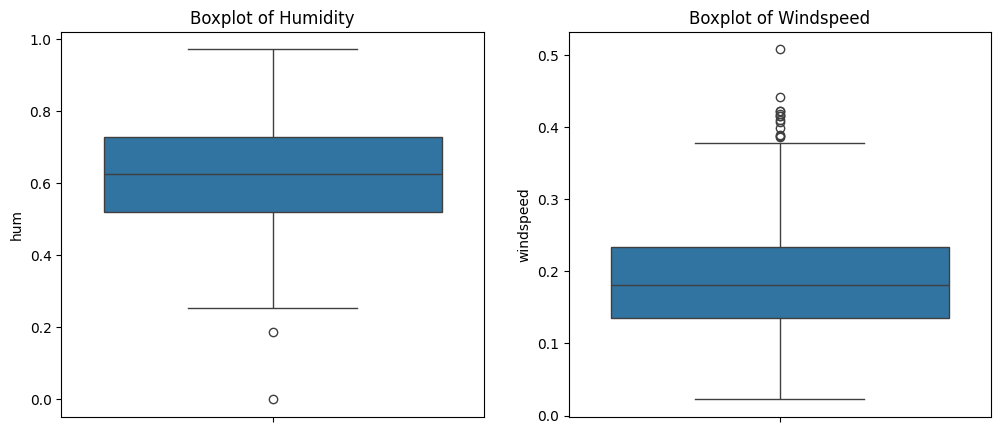

In [14]:
plt.figure(figsize=(12, 5))

# Boxplot untuk Humidity
plt.subplot(1, 2, 1)
sns.boxplot(y=day_df['hum'])
plt.title('Boxplot of Humidity')

# Boxplot untuk Windspeed
plt.subplot(1, 2, 2)
sns.boxplot(y=day_df['windspeed'])
plt.title('Boxplot of Windspeed')

plt.show()


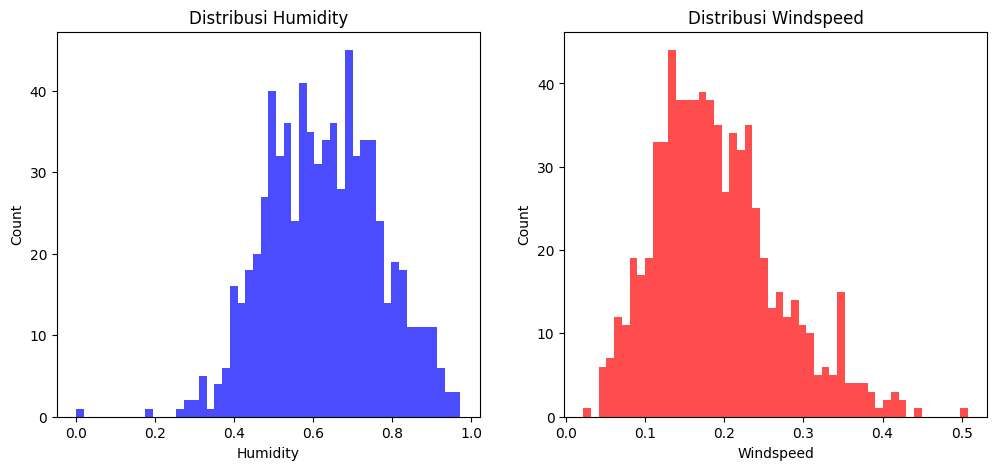

In [15]:
# Plot distribusi kelembaban
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.hist(day_df["hum"], bins=50, color="blue", alpha=0.7)
plt.xlabel("Humidity")
plt.ylabel("Count")
plt.title("Distribusi Humidity")

# Plot distribusi windspeed
plt.subplot(1,2,2)
plt.hist(day_df["windspeed"], bins=50, color="red", alpha=0.7)
plt.xlabel("Windspeed")
plt.ylabel("Count")
plt.title("Distribusi Windspeed")

plt.show()

*pengecekan outlier humidity dan windspeed pada hour.csv*

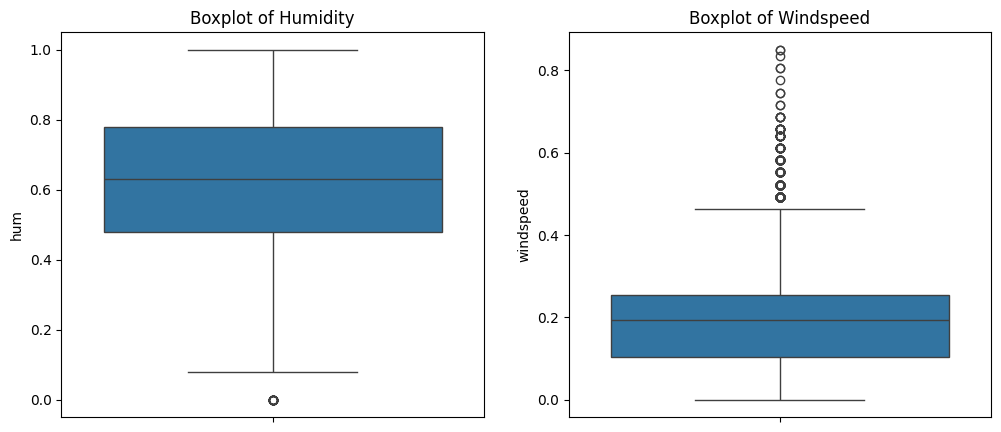

In [16]:
plt.figure(figsize=(12, 5))

# Boxplot untuk Humidity
plt.subplot(1, 2, 1)
sns.boxplot(y=hour_df['hum'])
plt.title('Boxplot of Humidity')

# Boxplot untuk Windspeed
plt.subplot(1, 2, 2)
sns.boxplot(y=hour_df['windspeed'])
plt.title('Boxplot of Windspeed')

plt.show()

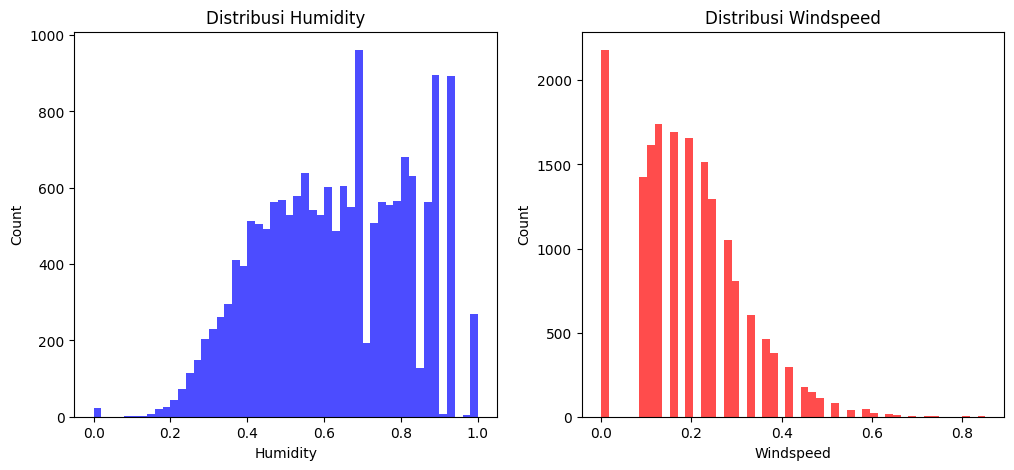

In [17]:
# Plot distribusi kelembaban
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.hist(hour_df["hum"], bins=50, color="blue", alpha=0.7)
plt.xlabel("Humidity")
plt.ylabel("Count")
plt.title("Distribusi Humidity")

# Plot distribusi windspeed
plt.subplot(1,2,2)
plt.hist(hour_df["windspeed"], bins=50, color="red", alpha=0.7)
plt.xlabel("Windspeed")
plt.ylabel("Count")
plt.title("Distribusi Windspeed")

plt.show()

**Insight: Analisis Awal**
1. Humidity (hum)
   - Day.csv: Hanya ada 1 nilai nol, terlihat sebagai outlier di bagian bawah.
   - Hour.csv: Ada 22 nilai nol, salah satunya terlihat jelas di bawah whisker
    
2. Windspeed
   - Day.csv: Ditemukan ada nya outlier, karena nilai berpusat disketar nilai 0.2
   - Hour.csv: Ada banyak outlier di bagian atas, yang menunjukkan distribusi
     skewed ke kanan.

Ada 2180 nilai nol windspeed dalam hour.csv, tetapi tidak ada di day.csv. Ada banyak kemungkinan bahwa Data windspeed ataupun hum bernilai nol dan salah satunya ini bisa jadi missing value terselubung (bukan benar-benar nol, tetapi kegagalan pencatatan data). Namun karena tidak ditemukan adanya keterangan lanjutan dalam catatan pendukung dataset, makan analisa menggunakan IQR akan dilakukan

*Deteksi Outlier pada column hum dengan IQR*

In [18]:
Q1 = day_df['hum'].quantile(0.25)
Q3 = day_df['hum'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = day_df[(day_df['hum'] < lower_bound) | (day_df['hum'] > upper_bound)]
print(outliers)


    instant     dteday season yr mnth holiday weekday workingday weathersit  \
49       50 2011-02-19      1  0    2       0       6          0          1   
68       69 2011-03-10      1  0    3       0       4          1          3   

        temp     atemp       hum  windspeed  casual  registered   cnt  
49  0.399167  0.391404  0.187917   0.507463     532        1103  1635  
68  0.389091  0.385668  0.000000   0.261877      46         577   623  


In [19]:
# Hitung Q1 dan Q3
Q1 = hour_df['hum'].quantile(0.25)
Q3 = hour_df['hum'].quantile(0.75)

# Hitung IQR
IQR = Q3 - Q1

# Tentukan batas bawah dan atas
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Cari outlier
outliers = hour_df[(hour_df['hum'] < lower_bound) | (hour_df['hum'] > upper_bound)]
print(outliers)


      instant     dteday season yr mnth  hr holiday weekday workingday  \
1551     1552 2011-03-10      1  0    3   0       0       4          1   
1552     1553 2011-03-10      1  0    3   1       0       4          1   
1553     1554 2011-03-10      1  0    3   2       0       4          1   
1554     1555 2011-03-10      1  0    3   5       0       4          1   
1555     1556 2011-03-10      1  0    3   6       0       4          1   
1556     1557 2011-03-10      1  0    3   7       0       4          1   
1557     1558 2011-03-10      1  0    3   8       0       4          1   
1558     1559 2011-03-10      1  0    3   9       0       4          1   
1559     1560 2011-03-10      1  0    3  10       0       4          1   
1560     1561 2011-03-10      1  0    3  11       0       4          1   
1561     1562 2011-03-10      1  0    3  12       0       4          1   
1562     1563 2011-03-10      1  0    3  13       0       4          1   
1563     1564 2011-03-10      1  0    

**Insight: Analisis Outlier**
- Nilai hum = 0.0 pada 2011-03-10 jelas anomali, karena kelembapan udara tidak mungkin benar-benar 0% dalam seharian penuh dan terlebih lagi dalam kondisi cuaca 3 (Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds)

- Nilai 0.187917 pada 2011-02-19 (pada day.csv) juga jauh lebih rendah dari rentang normal kelembapan, namun jika diselidiki lebih lanjut pada hari tersebut cuaca jatuh kedalam kategori 1 (Clear, Few clouds, Partly cloudy, Partly cloudy) hal ini justru sesuai karena memang sepntasnya kelembapan rendah pada cuaca seperti ini. Oleh sebab itu hal ini akan dianggap sebagai **bukan outlier**

*Deteksi Outlier pada colum windspeed dengan IQR*

In [20]:
Q1 = day_df['windspeed'].quantile(0.25)
Q3 = day_df['windspeed'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = day_df[(day_df['windspeed'] < lower_bound) | (day_df['windspeed'] > upper_bound)]
print(outliers)


     instant     dteday season yr mnth holiday weekday workingday weathersit  \
44        45 2011-02-14      1  0    2       0       1          1          1   
49        50 2011-02-19      1  0    2       0       6          0          1   
93        94 2011-04-04      2  0    4       0       1          1          1   
94        95 2011-04-05      2  0    4       0       2          1          2   
292      293 2011-10-20      4  0   10       0       4          1          1   
382      383 2012-01-18      1  1    1       0       3          1          1   
407      408 2012-02-12      1  1    2       0       0          0          1   
420      421 2012-02-25      1  1    2       0       6          0          1   
432      433 2012-03-08      1  1    3       0       4          1          1   
433      434 2012-03-09      1  1    3       0       5          1          2   
450      451 2012-03-26      2  1    3       0       1          1          1   
666      667 2012-10-28      4  1   10  

In [21]:
Q1 = hour_df['windspeed'].quantile(0.25)
Q3 = hour_df['windspeed'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = hour_df[(hour_df['windspeed'] < lower_bound) | (hour_df['windspeed'] > upper_bound)]
print(outliers)


       instant     dteday season yr mnth  hr holiday weekday workingday  \
175        176 2011-01-08      1  0    1  14       0       6          0   
178        179 2011-01-08      1  0    1  17       0       6          0   
194        195 2011-01-09      1  0    1   9       0       0          0   
196        197 2011-01-09      1  0    1  11       0       0          0   
265        266 2011-01-12      1  0    1  12       0       3          1   
...        ...        ...    ... ..  ...  ..     ...     ...        ...   
17327    17328 2012-12-29      1  1   12  20       0       6          0   
17328    17329 2012-12-29      1  1   12  21       0       6          0   
17341    17342 2012-12-30      1  1   12  10       0       0          0   
17343    17344 2012-12-30      1  1   12  12       0       0          0   
17344    17345 2012-12-30      1  1   12  13       0       0          0   

      weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
175            1  0.20  

**Insight: Analisis Outlier**
- Berdasarkan analisis IQR windspeed ini didapat bahwa rentang data berpusat di 0.1 - 0.3 yang dimana ini sesuai dengan boxplot
- pada hour_df banyak nilai windspeed yang diatas 0.4 bahkan jika mengacu pada boxplot ditemukan ada nilai 0.8 - 0.9

**penanganan outlier**
1. pada column hum dan windspeed yang bernilai 0 akan dilakukan imputasi median hal ini dikarenakan median sulit terpengaruh oleh outlier.
2. pada column windspeed yang terdapat outlier melalui analisis IQR, maka akan dilakukan winsorizing. Hal ini dilakukan karena nilai outlier yang berjumlah cukup banyak sehingga winsorizing dipilih agar menjaga keakuratan data tanpa menghapus informasi penting

*imputasi median pada column hum dan winspeed yang bernilai 0*

In [22]:
for df in [day_df, hour_df]:
    df["hum"] = df["hum"].replace(0, df["hum"].median())
    df["windspeed"] = df["windspeed"].replace(0, df["windspeed"].median())

print((day_df['hum'] == 0).sum(), "nilai 0 dalam hum (day.csv)")
print((day_df['windspeed'] == 0).sum(), "nilai 0 dalam windspeed (day.csv)")
print((hour_df['hum'] == 0).sum(), "nilai 0 dalam hum (hour.csv)")
print((hour_df['windspeed'] == 0).sum(), "nilai 0 dalam windspeed (hour.csv)")

0 nilai 0 dalam hum (day.csv)
0 nilai 0 dalam windspeed (day.csv)
0 nilai 0 dalam hum (hour.csv)
0 nilai 0 dalam windspeed (hour.csv)


In [23]:
def winsorize_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df[column] = winsorize(df[column], limits=(0, (df[column] > upper_bound).mean()))
    return df

for df in [day_df, hour_df]:
    df = winsorize_outliers(df, "hum")
    df = winsorize_outliers(df, "windspeed")

print(day_df[["hum", "windspeed"]].describe())
print(hour_df[["hum", "windspeed"]].describe())

              hum   windspeed
count  731.000000  731.000000
mean     0.628751    0.189801
std      0.140518    0.075532
min      0.187917    0.022392
25%      0.521041    0.134950
50%      0.626667    0.180975
75%      0.730209    0.233214
max      0.972500    0.378108
                hum     windspeed
count  17379.000000  17379.000000
mean       0.628026      0.211174
std        0.191633      0.089762
min        0.080000      0.089600
25%        0.480000      0.134300
50%        0.630000      0.194000
75%        0.780000      0.253700
max        1.000000      0.417900


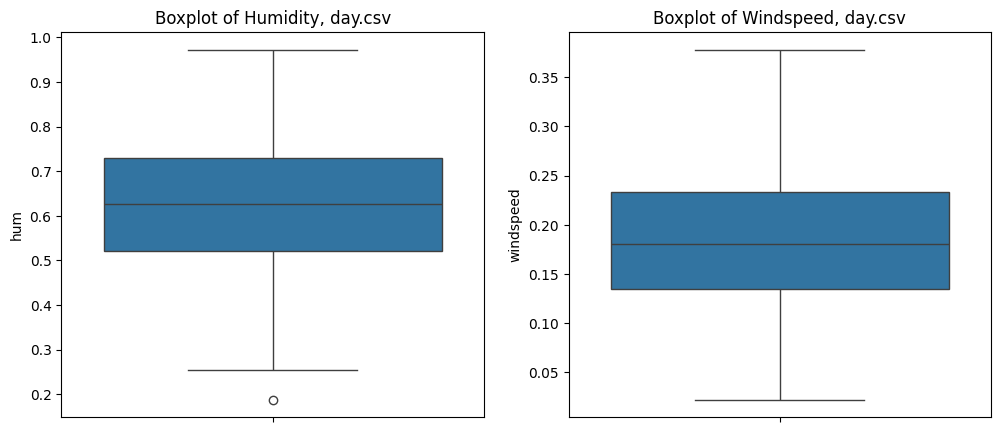

In [24]:
plt.figure(figsize=(12, 5))

# Boxplot untuk Humidity
plt.subplot(1, 2, 1)
sns.boxplot(y=day_df['hum'])
plt.title('Boxplot of Humidity, day.csv')

# Boxplot untuk Windspeed
plt.subplot(1, 2, 2)
sns.boxplot(y=day_df['windspeed'])
plt.title('Boxplot of Windspeed, day.csv')

plt.show()

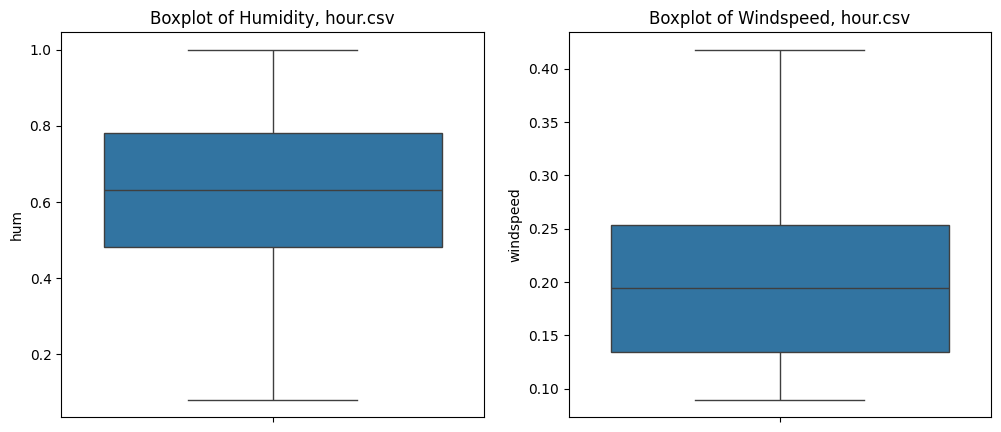

In [25]:
plt.figure(figsize=(12, 5))

# Boxplot untuk Humidity
plt.subplot(1, 2, 1)
sns.boxplot(y=hour_df['hum'])
plt.title('Boxplot of Humidity, hour.csv')

# Boxplot untuk Windspeed
plt.subplot(1, 2, 2)
sns.boxplot(y=hour_df['windspeed'])
plt.title('Boxplot of Windspeed, hour.csv')

plt.show()

**Insight: Dari boxplot diatas dapat disimpulkan bahwa :**
- pada column *hum* dan *windspeed* sudah tidak detemukan ada nya outlier extreme atau bahkan anomali nilai 0

- Namun ada satu nilai *hum* pada day.csv yang memang dapat dianggap sebagai outlier, tetapi hal ini tidak akan ditangani lebih lanjut, dikarena alasan yang sebelumnya sudah dijelaskan yakni kelembapan rendah memang cocok pada kondisi cuaca tersebut (weahter sit 1). Telebih lagi tidak adanya keterangan tambahan/bukti konkrit mengenai kondisi ini



---




*jumlah data dengaan nilai 0 dalam temp dan atemp*

In [26]:
print((day_df['temp'] == 0).sum(), "nilai 0 dalam temp (day.csv)")
print((day_df['atemp'] == 0).sum(), "nilai 0 dalam atemp (day.csv)")
print((hour_df['temp'] == 0).sum(), "nilai 0 dalam temp (hour.csv)")
print((hour_df['atemp'] == 0).sum(), "nilai 0 dalam atemp (hour.csv)")

0 nilai 0 dalam temp (day.csv)
0 nilai 0 dalam atemp (day.csv)
0 nilai 0 dalam temp (hour.csv)
2 nilai 0 dalam atemp (hour.csv)


*pengecekan outlier temp dan atemp pada day.csv*

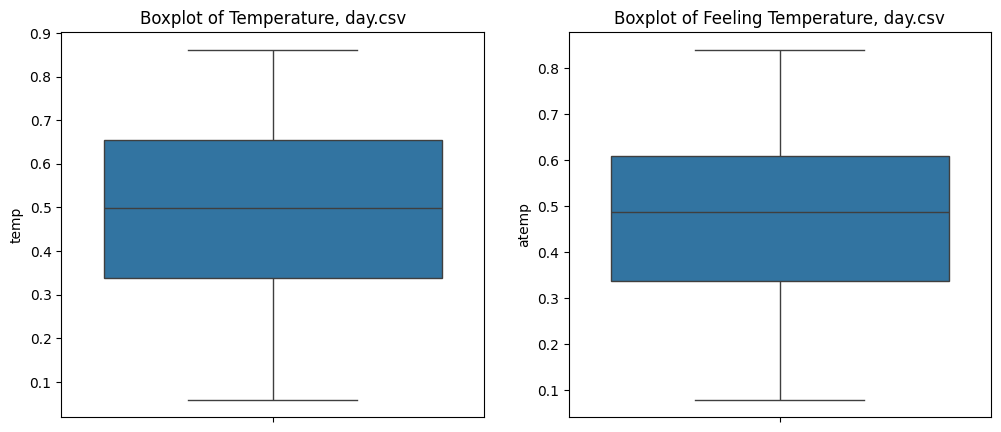

In [27]:
plt.figure(figsize=(12, 5))

# Boxplot untuk Temperature
plt.subplot(1, 2, 1)
sns.boxplot(y=day_df['temp'])
plt.title('Boxplot of Temperature, day.csv')

# Boxplot untuk Feeling tempearture
plt.subplot(1, 2, 2)
sns.boxplot(y=day_df['atemp'])
plt.title('Boxplot of Feeling Temperature, day.csv')

plt.show()


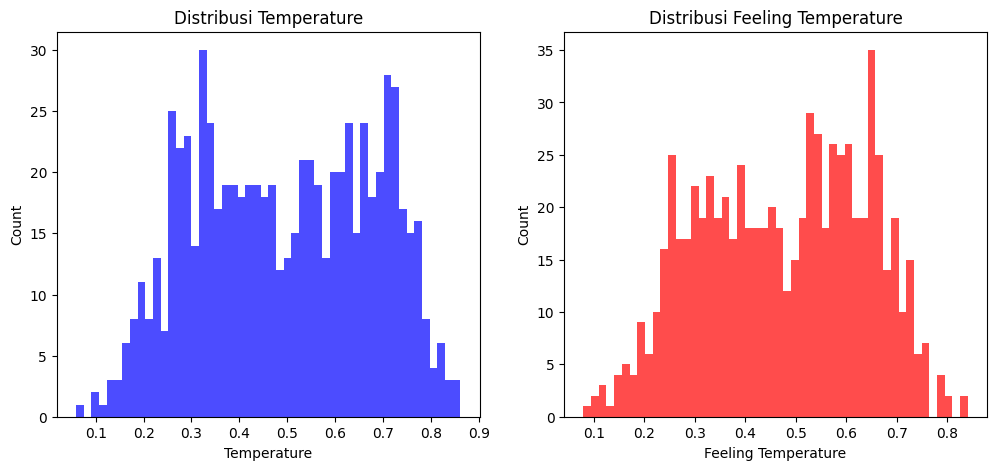

In [28]:
# Plot distribusi temp
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.hist(day_df["temp"], bins=50, color="blue", alpha=0.7)
plt.xlabel("Temperature")
plt.ylabel("Count")
plt.title("Distribusi Temperature")

# Plot distribusi atemp
plt.subplot(1,2,2)
plt.hist(day_df["atemp"], bins=50, color="red", alpha=0.7)
plt.xlabel("Feeling Temperature")
plt.ylabel("Count")
plt.title("Distribusi Feeling Temperature")

plt.show()

**Insight: Dari boxplot diatas dapat disimpulkan bahwa :**
- tidak ditemukan nilai suhu anomali (normalisasi 0 atau 0°C) pada kedua dataset

- tidak ditemukan juga adanya outlier

*pengecekan outlier temp dan atemp pada hour.csv*

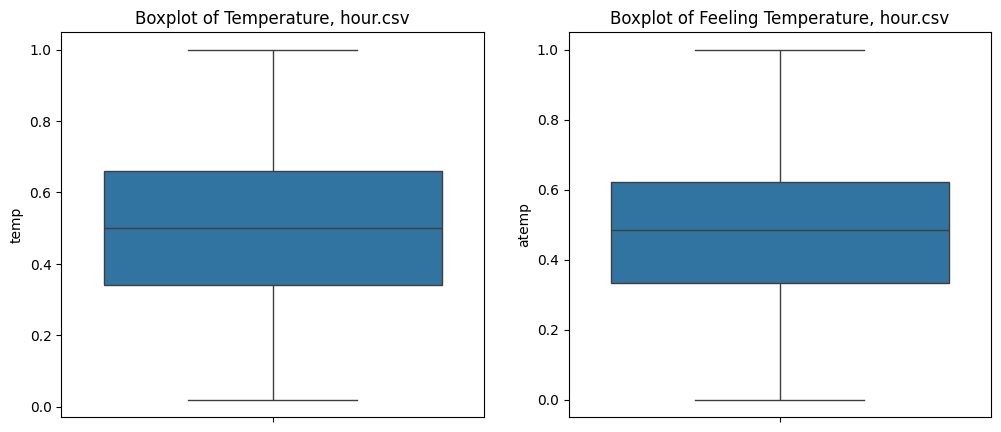

In [29]:
plt.figure(figsize=(12, 5))

# Boxplot untuk Temperature
plt.subplot(1, 2, 1)
sns.boxplot(y=hour_df['temp'])
plt.title('Boxplot of Temperature, hour.csv')

# Boxplot untuk Feeling tempearture
plt.subplot(1, 2, 2)
sns.boxplot(y=hour_df['atemp'])
plt.title('Boxplot of Feeling Temperature, hour.csv')

plt.show()


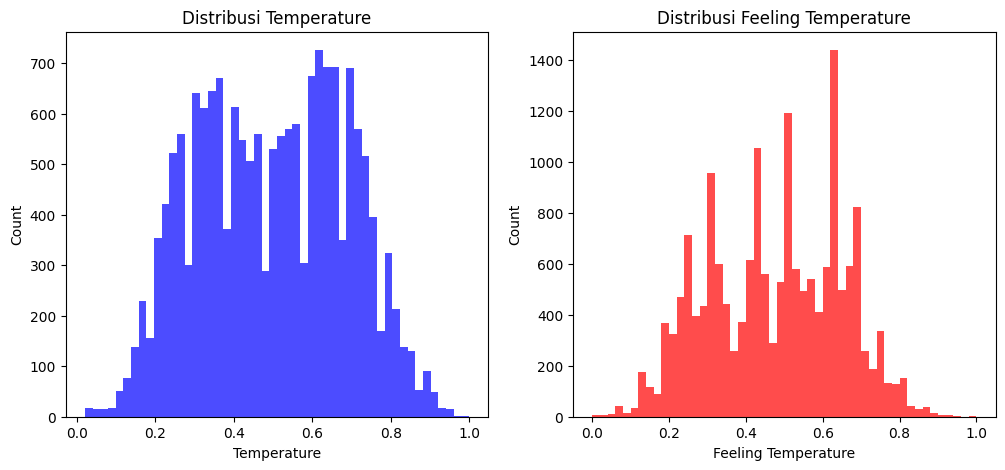

In [30]:
# Plot distribusi temp
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.hist(hour_df["temp"], bins=50, color="blue", alpha=0.7)
plt.xlabel("Temperature")
plt.ylabel("Count")
plt.title("Distribusi Temperature")

# Plot distribusi atemp
plt.subplot(1,2,2)
plt.hist(hour_df["atemp"], bins=50, color="red", alpha=0.7)
plt.xlabel("Feeling Temperature")
plt.ylabel("Count")
plt.title("Distribusi Feeling Temperature")

plt.show()


**Insight: Dari boxplot diatas dapat disimpulkan bahwa :**
- ditemukan adanya nilai anomali yakni normalisasi 0 atau 0°C pada suhu yang dirasakan (atemp) ini jelas tidak mungkin karena ini mengindikasi kondisi suhu yang extreme (titik beku air)

- tidak ditemukan juga adanya outlier

- akan dilakukan imputasi median pada nilai 0 di column atemp hour.csv

*imputasi median pada column atemp yang bernilai 0*

In [31]:
median_atemp = hour_df[hour_df["atemp"] > 0]["atemp"].median()
hour_df["atemp"] = hour_df["atemp"].replace(0, median_atemp)
print(hour_df["atemp"].value_counts()[0] if 0 in hour_df["atemp"].values else "Tidak ada nilai 0 atemp di hour_df")

Tidak ada nilai 0 atemp di hour_df


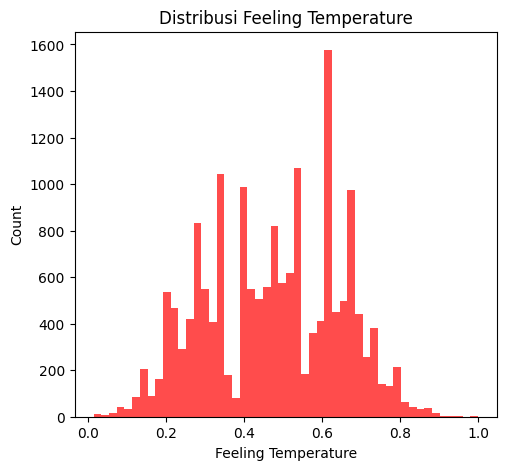

In [32]:
# Plot distribusi atemp
plt.figure(figsize=(12,5))
plt.subplot(1,2,2)
plt.hist(hour_df["atemp"], bins=50, color="red", alpha=0.7)
plt.xlabel("Feeling Temperature")
plt.ylabel("Count")
plt.title("Distribusi Feeling Temperature")

plt.show()

## Exploratory Data Analysis (EDA)

### Explore day_df

In [33]:
day_df.describe(include='all')


/usr/local/lib/python3.11/dist-packages/numpy/lib/function_base.py:4824: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.11/dist-packages/numpy/lib/function_base.py:4824: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.0,731.0,731.0,731.0,731.0,731.0,731.0,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,NaN,4.0,2.0,12.0,2.0,7.0,2.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,3.0,1.0,1.0,0.0,0.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,188.0,366.0,62.0,710.0,105.0,500.0,463.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,2012-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.495385,0.474354,0.628751,0.189801,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.059130,0.079070,0.187917,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.337083,0.337842,0.521041,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.861667,0.840896,0.972500,0.378108,3410.000000,6946.000000,8714.000000


In [34]:
day_df.head(20)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
5,6,2011-01-06,1,0,1,0,4,1,1,0.204348,0.233209,0.518261,0.089565,88,1518,1606
6,7,2011-01-07,1,0,1,0,5,1,2,0.196522,0.208839,0.498696,0.168726,148,1362,1510
7,8,2011-01-08,1,0,1,0,6,0,2,0.165000,0.162254,0.535833,0.266804,68,891,959
8,9,2011-01-09,1,0,1,0,0,0,1,0.138333,0.116175,0.434167,0.361950,54,768,822
9,10,2011-01-10,1,0,1,0,1,1,1,0.150833,0.150888,0.482917,0.223267,41,1280,1321


In [35]:
day_df.describe(include=['category', 'object'])

,season,yr,mnth,holiday,weekday,workingday,weathersit
count,731,731,731,731,731,731,731
unique,4,2,12,2,7,2,3
top,3,1,1,0,0,1,1
freq,188,366,62,710,105,500,463


In [36]:
day_df.describe(include=[np.number])

/usr/local/lib/python3.11/dist-packages/numpy/lib/function_base.py:4824: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.11/dist-packages/numpy/lib/function_base.py:4824: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.11/dist-packages/numpy/lib/function_base.py:4824: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.11/dist-packages/numpy/lib/function_base.py:4824: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(


,instant,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,0.495385,0.474354,0.628751,0.189801,848.176471,3656.172367,4504.348837
std,211.165812,0.183051,0.162961,0.140518,0.075532,686.622488,1560.256377,1937.211452
min,1.000000,0.059130,0.079070,0.187917,0.022392,2.000000,20.000000,22.000000
25%,183.500000,0.337083,0.337842,0.521041,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,0.861667,0.840896,0.972500,0.378108,3410.000000,6946.000000,8714.000000


In [37]:
print(day_df.isnull().sum())

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


### Explore hour_df

In [38]:
hour_df.describe(include='all')

/usr/local/lib/python3.11/dist-packages/numpy/lib/function_base.py:4824: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.11/dist-packages/numpy/lib/function_base.py:4824: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.0,17379.0,17379.0,17379.0,17379.0,17379.0,17379.0,17379.0,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,NaN,4.0,2.0,12.0,24.0,2.0,7.0,2.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,3.0,1.0,5.0,17.0,0.0,6.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,4496.0,8734.0,1488.0,730.0,16879.0,2512.0,11865.0,11413.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,2012-01-02 04:08:34.552045568,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.496987,0.475831,0.628026,0.211174,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.020000,0.015200,0.080000,0.089600,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.340000,0.333300,0.480000,0.134300,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,1.000000,0.417900,367.000000,886.000000,977.000000


In [39]:
hour_df.head(20)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.1940,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.1940,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.1940,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.1940,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.1940,0,1,1
5,6,2011-01-01,1,0,1,5,0,6,0,2,0.24,0.2576,0.75,0.0896,0,1,1
6,7,2011-01-01,1,0,1,6,0,6,0,1,0.22,0.2727,0.80,0.1940,2,0,2
7,8,2011-01-01,1,0,1,7,0,6,0,1,0.20,0.2576,0.86,0.1940,1,2,3
8,9,2011-01-01,1,0,1,8,0,6,0,1,0.24,0.2879,0.75,0.1940,1,7,8
9,10,2011-01-01,1,0,1,9,0,6,0,1,0.32,0.3485,0.76,0.1940,8,6,14


In [40]:
hour_df.describe(include=['category', 'object'])

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit
count,17379,17379,17379,17379,17379,17379,17379,17379
unique,4,2,12,24,2,7,2,4
top,3,1,5,17,0,6,1,1
freq,4496,8734,1488,730,16879,2512,11865,11413


In [41]:
hour_df.describe(include=[np.number])

/usr/local/lib/python3.11/dist-packages/numpy/lib/function_base.py:4824: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.11/dist-packages/numpy/lib/function_base.py:4824: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.11/dist-packages/numpy/lib/function_base.py:4824: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.11/dist-packages/numpy/lib/function_base.py:4824: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(


,instant,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,0.496987,0.475831,0.628026,0.211174,35.676218,153.786869,189.463088
std,5017.0295,0.192556,0.171774,0.191633,0.089762,49.305030,151.357286,181.387599
min,1.0000,0.020000,0.015200,0.080000,0.089600,0.000000,0.000000,1.000000
25%,4345.5000,0.340000,0.333300,0.480000,0.134300,4.000000,34.000000,40.000000
50%,8690.0000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,1.000000,1.000000,1.000000,0.417900,367.000000,886.000000,977.000000


In [42]:
print(hour_df.isnull().sum())

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


**Insight:**
- Dengan exploratory analysis kali ini terlihat jelas bahwa day.csv memang merupakan agregasi dari hour.csv, dengan kata lain hour.csv memiliki detail dari day.csv.
- untuk proses selanjutnya karena esensi nya kedua data set ini sama, maka diputuskan untuk memakai day.csv saja karena untuk analysis kali ini cukup berfokus pada musim, cuaca, dan juga jumlah dari rented bikes (casual/registerd/keduanya)

### Explore main data day_df

In [38]:
day_df.describe(include='all')


/usr/local/lib/python3.11/dist-packages/numpy/lib/function_base.py:4824: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.11/dist-packages/numpy/lib/function_base.py:4824: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.0,731.0,731.0,731.0,731.0,731.0,731.0,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,NaN,4.0,2.0,12.0,2.0,7.0,2.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,3.0,1.0,1.0,0.0,0.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,188.0,366.0,62.0,710.0,105.0,500.0,463.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,2012-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.495385,0.474354,0.628751,0.189801,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.059130,0.079070,0.187917,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.337083,0.337842,0.521041,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.861667,0.840896,0.972500,0.378108,3410.000000,6946.000000,8714.000000


In [39]:
day_df.head(20)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
5,6,2011-01-06,1,0,1,0,4,1,1,0.204348,0.233209,0.518261,0.089565,88,1518,1606
6,7,2011-01-07,1,0,1,0,5,1,2,0.196522,0.208839,0.498696,0.168726,148,1362,1510
7,8,2011-01-08,1,0,1,0,6,0,2,0.165000,0.162254,0.535833,0.266804,68,891,959
8,9,2011-01-09,1,0,1,0,0,0,1,0.138333,0.116175,0.434167,0.361950,54,768,822
9,10,2011-01-10,1,0,1,0,1,1,1,0.150833,0.150888,0.482917,0.223267,41,1280,1321


In [40]:
day_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    category      
 3   yr          731 non-null    category      
 4   mnth        731 non-null    category      
 5   holiday     731 non-null    category      
 6   weekday     731 non-null    category      
 7   workingday  731 non-null    category      
 8   weathersit  731 non-null    category      
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: category(7), datetime64

In [53]:
day_df.corr()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,1.000000,1.000000,0.412224,0.866025,0.496702,0.016145,-0.000016,-0.004337,-0.021477,0.150580,0.152638,0.008005,-0.112683,0.275255,0.659623,0.628830
dteday,1.000000,1.000000,0.412224,0.866025,0.496702,0.016145,-0.000016,-0.004337,-0.021477,0.150580,0.152638,0.008005,-0.112683,0.275255,0.659623,0.628830
season,0.412224,0.412224,1.000000,-0.001844,0.831440,-0.010537,-0.003080,0.012485,0.019211,0.334315,0.342876,0.200008,-0.226338,0.210399,0.411623,0.406100
yr,0.866025,0.866025,-0.001844,1.000000,-0.001792,0.007954,-0.005461,-0.002013,-0.048727,0.047604,0.046106,-0.118269,-0.012823,0.248546,0.594248,0.566710
mnth,0.496702,0.496702,0.831440,-0.001792,1.000000,0.019191,0.009509,-0.005901,0.043528,0.220205,0.227459,0.218997,-0.205800,0.123006,0.293488,0.279977
holiday,0.016145,0.016145,-0.010537,0.007954,0.019191,1.000000,-0.101960,-0.253023,-0.034627,-0.028556,-0.032507,-0.017204,0.008016,0.054274,-0.108745,-0.068348
weekday,-0.000016,-0.000016,-0.003080,-0.005461,0.009509,-0.101960,1.000000,0.035790,0.031087,-0.000170,-0.007537,-0.049887,0.010005,0.059923,0.057367,0.067443
workingday,-0.004337,-0.004337,0.012485,-0.002013,-0.005901,-0.253023,0.035790,1.000000,0.061200,0.052660,0.052182,0.028808,-0.015586,-0.518044,0.303907,0.061156
weathersit,-0.021477,-0.021477,0.019211,-0.048727,0.043528,-0.034627,0.031087,0.061200,1.000000,-0.120602,-0.121583,0.617075,0.044913,-0.247353,-0.260388,-0.297391
temp,0.150580,0.150580,0.334315,0.047604,0.220205,-0.028556,-0.000170,0.052660,-0.120602,1.000000,0.991702,0.125142,-0.156822,0.543285,0.540012,0.627494


**Insight:**
1. Variabel yang paling berkorelasi dengan cnt (total peminjaman sepeda):
 - registered (0.95): Pengguna terdaftar memiliki korelasi yang sangat tinggi dengan jumlah total peminjaman.
 - casual (0.67): Pengguna tidak terdaftar juga memiliki korelasi positif, tapi lebih rendah dibanding registered.
 - temp (0.63) dan atemp (0.63): Suhu berhubungan positif dengan jumlah peminjaman, artinya semakin panas, semakin banyak sepeda dipinjam.
 - yr (0.56): Tren jumlah peminjaman meningkat dari tahun ke tahun.
 - season (0.41) dan mnth (0.28): Musim dan bulan juga memiliki hubungan positif, kemungkinan lebih banyak peminjaman pada musim tertentu.

2. Variabel yang memiliki korelasi negatif dengan cnt:
 - weathersit (-0.29): Cuaca memiliki korelasi yang buruk dengan jumlah peminjamaan sepeda, kemungkina besar cuaca yang lebih buruk mengurangi jumlah peminjaman.
 - windspeed (-0.23) dan hum (-0.11): Kelembaban dan kecepatan angin memili korelasi yang buruk terhadap jumlah peminjaman sepeda

*Convert day.csv to cleaned_day.csv*

In [41]:
day_df.to_csv("day_cleaned.csv", index=False)

## Visualization & Explanatory Analysis

In [49]:
df = pd.read_csv("day_cleaned.csv", parse_dates=["dteday"])
category_columns = ["season", "yr", "mnth", "holiday", "weekday", "workingday", "weathersit"]
df[category_columns] = df[category_columns].astype("category")

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    category      
 3   yr          731 non-null    category      
 4   mnth        731 non-null    category      
 5   holiday     731 non-null    category      
 6   weekday     731 non-null    category      
 7   workingday  731 non-null    category      
 8   weathersit  731 non-null    category      
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: category(7), datetime64

### Pertanyaan 1: Bagaimana trend antara penyewaan sepeda antara pengguna casual dan registered?

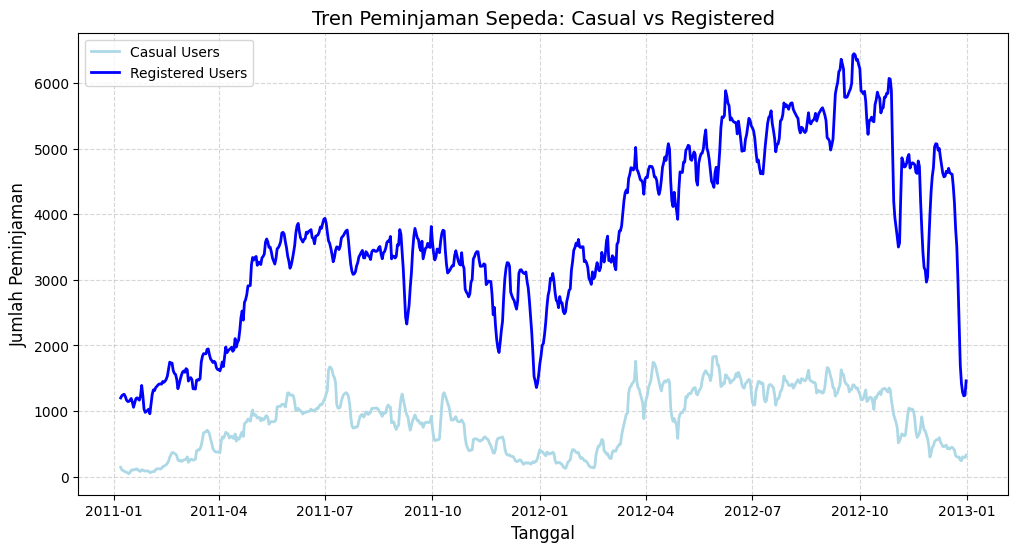

In [76]:
df['casual_smooth'] = df['casual'].rolling(window=7).mean()
df['registered_smooth'] = df['registered'].rolling(window=7).mean()

plt.figure(figsize=(12, 6))
plt.plot(df['dteday'], df['casual_smooth'], label="Casual Users", color='lightblue', linewidth=2)
plt.plot(df['dteday'], df['registered_smooth'], label="Registered Users", color='blue', linewidth=2)
plt.title("Tren Peminjaman Sepeda: Casual vs Registered", fontsize=14)
plt.xlabel("Tanggal", fontsize=12)
plt.ylabel("Jumlah Peminjaman", fontsize=12)
plt.legend()
plt.grid(True, linestyle="--", alpha=0.5)

plt.show()

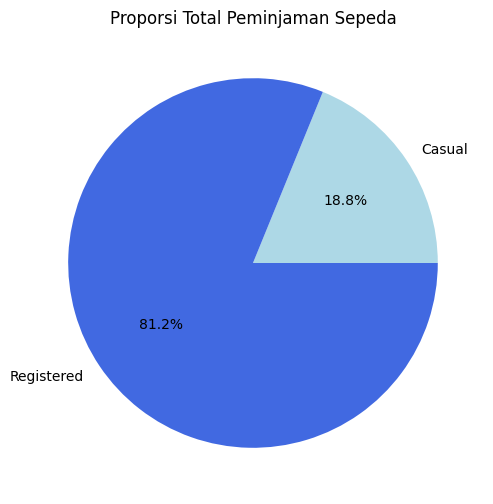

In [75]:
plt.figure(figsize=(6, 6))
plt.pie([df['casual'].sum(), df['registered'].sum()], labels=['Casual', 'Registered'], autopct='%1.1f%%', colors=['lightblue', 'royalblue'])
plt.title('Proporsi Total Peminjaman Sepeda')
plt.show()

**Insight:**
- berdasarkan char diatas disimpulkan bahwa pengguna registered sangatlah mendominasi total peminjaman sepeda.

### Pertanyaan 2: Apakah musim memiliki pengaruh terhadap peminjaman sepeda?

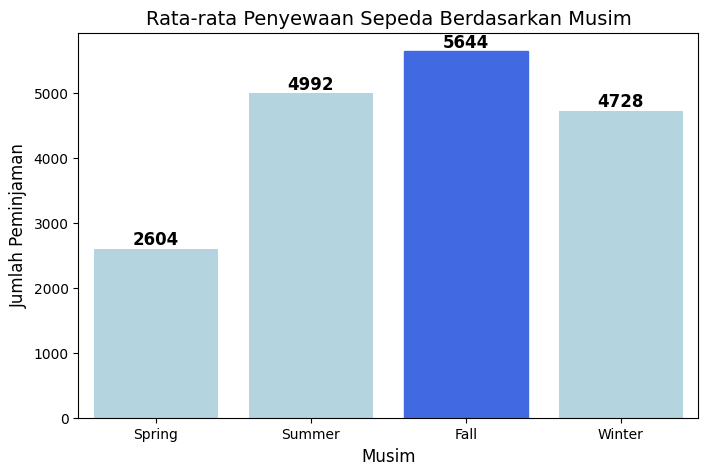

In [69]:
season_avg = df.groupby('season', observed=False)['cnt'].mean().reset_index()
season_labels = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}
season_avg['season_label'] = season_avg['season'].map(season_labels)
base_color = 'royalblue'
fade_color = 'lightblue'
max_value = season_avg['cnt'].max()

plt.figure(figsize=(8, 5))
ax = sns.barplot(x='season_label', y='cnt', data=season_avg, color=fade_color)

for p, value in zip(ax.patches, season_avg['cnt']):
    if value == max_value:
        p.set_color(base_color)

    ax.annotate(f"{value:.0f}",
                (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=12, fontweight='bold', color='black')

plt.title("Rata-rata Penyewaan Sepeda Berdasarkan Musim", fontsize=14)
plt.xlabel("Musim", fontsize=12)
plt.ylabel("Jumlah Peminjaman", fontsize=12)

plt.show()


**Insight:**
- Berdasarkan chart diatas dapat ditentukan bahwa musim-musim tertentu memiliki pengaruh yang berbeda-beda terhadap total penyewaan.


### Pertanyaan 3: Kondisi cuaca seperti apakah yang menghasilkan jumlah penyewaan sepeda tertinggi?

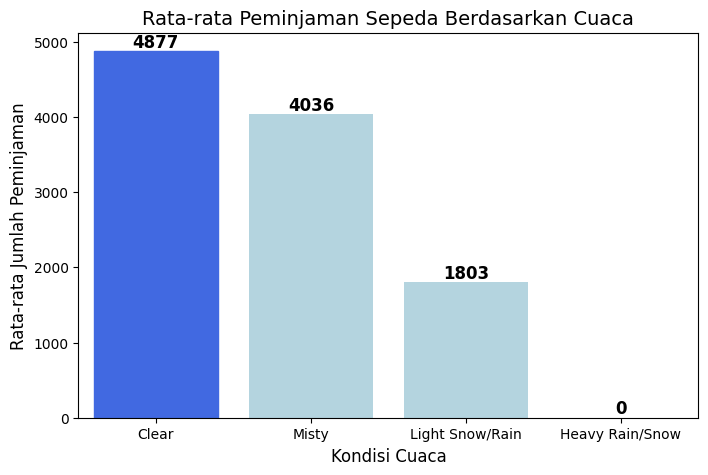

In [95]:
all_weather = pd.DataFrame({
    'weathersit': [1, 2, 3, 4],
    'weather_description': ['Clear', 'Misty', 'Light Snow/Rain', 'Heavy Rain/Snow']
})

weather_avg = df.groupby('weathersit', observed=False)['cnt'].mean().reset_index()
weather_avg = pd.merge(all_weather, weather_avg, on='weathersit', how='left')
weather_avg['cnt'] = weather_avg['cnt'].astype(float).fillna(0)

weather_labels = {1: 'Clear', 2: 'Misty', 3: 'Light Snow/Rain', 4: 'Heavy Rain/Snow'}
weather_avg['weathersit_label'] = weather_avg['weathersit'].map(weather_labels)

base_color = 'royalblue'
fade_color = 'lightblue'

max_value = weather_avg['cnt'].max()

plt.figure(figsize=(8, 5))
ax = sns.barplot(x='weathersit_label', y='cnt', data=weather_avg, color=fade_color)

for p, value in zip(ax.patches, weather_avg['cnt']):
    if value == max_value:
        p.set_color(base_color)

    ax.annotate(f"{value:.0f}",
                (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=12, fontweight='bold', color='black')

plt.title("Rata-rata Peminjaman Sepeda Berdasarkan Cuaca", fontsize=14)
plt.xlabel("Kondisi Cuaca", fontsize=12)
plt.ylabel("Rata-rata Jumlah Peminjaman", fontsize=12)

plt.show()


**Insight:**
- Berdasarkan chart diatas cuaca sangat berpengaruh terhadap penyewaan sepeda, dimana cuaca cerah tampak sangatlah diminati

### Pertanyaan 4: Berapakah titik suhu tertentu di mana orang lebih cenderung menyewa sepeda?


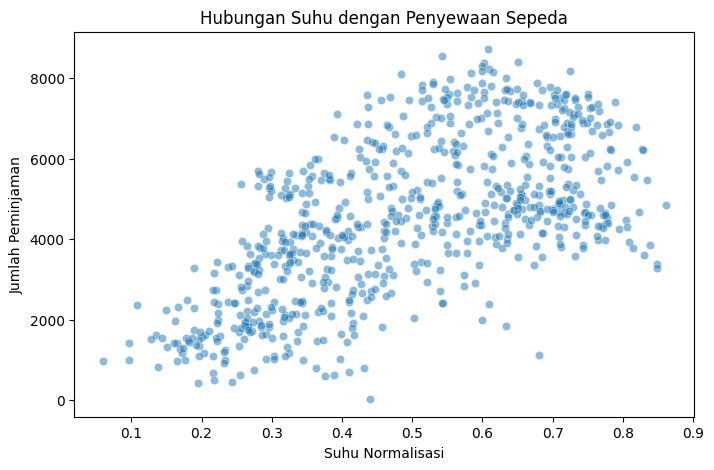

In [86]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x="temp", y="cnt", data=df, alpha=0.5)
plt.title("Hubungan Suhu dengan Penyewaan Sepeda")
plt.xlabel("Suhu Normalisasi")
plt.ylabel("Jumlah Peminjaman")
plt.show()

**Insight:**
- Berdasarkan chart diatas suhu yang lebih tinggi memiliki jumlah penyewaan yang relatif lebih tinggi pula

## Conclusion

1. Bagaimana perbandingan total penyewaan sepeda antara pengguna casual dan registered?
 -  Pengguna registered sangatlah mendominasi total peminjaman sepeda selama 2 tahun (2011-2013) dimana pengguna registered memilik proporsi sekitar 81.2% dibanding dengan casual yang hanya 18.2%. Namun dapat dilihat bahwa keduanya memili trend yang serupa dimana terdapat penurunan jumlah penyewaan pada bulan ke 10 sampai ke bulan 1 (tahun selanjutnya) dan setelahnya jumlah penyewaan berlangsung meningkat dengan pola yang nampaknya terulang kembali.

2. Apakah musim memiliki pengaruh terhadap peminjaman sepeda?
 - Musim-musim tertentu memiliki pengaruh yang berbeda-beda terhadap total penyewaan. Dimana summer dan fall menjadi penyumbang terbesar untuk jumlah penyewaan dan disusul oleh winter. Sementara Spring menjadi penyumbang terkecil terhadap jumlah penyewaan sepeda.

3. Kondisi cuaca seperti apakah yang menghasilkan jumlah penyewaan sepeda tertinggi?
 - Cuaca sangat berpengaruh terhadap penyewaan sepeda, dimana cuaca cerah tampak sangatlah diminati oleh pengguna untuk melakukan penyewaan sepeda. Sementara itu, cuaca yang tidak mendukung seperti hujan dan salju sangatlah tidak diminati dan bahkan pada cucaca extreme (hujan lebat/badai salju) tidak ada pengguna yang melakukan penyewaan.

4. Berapakah titik suhu tertentu di mana orang lebih cenderung menyewa sepeda?
 - suhu sangat berpengaruh pada penyewaan, suhu yang lebih tinggi memiliki jumlah penyewaan seped yang relatif lebih tinggi pula, selai itu ditemukan ada sekitar 8000 jumlah peminjaman pada suhu dengan normalisasi sekitar 0.6 (24.6°C)
